In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('new1.csv')


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q1      281 non-null    float64
 1   Q2      281 non-null    float64
 2   Q3      281 non-null    float64
 3   Q4      281 non-null    float64
 4   Q5      281 non-null    float64
 5   Q6      281 non-null    float64
 6   Q7      281 non-null    float64
 7   Q8      281 non-null    float64
 8   Q9      281 non-null    float64
 9   Q10     281 non-null    float64
 10  Q11     281 non-null    float64
 11  Q12     281 non-null    float64
 12  Q13     281 non-null    float64
 13  Q14     281 non-null    float64
 14  Q15     281 non-null    float64
 15  Q16     281 non-null    float64
 16  Q17     281 non-null    float64
 17  Q18     281 non-null    float64
 18  Q19     281 non-null    float64
 19  Q20     281 non-null    float64
 20  Class   281 non-null    object 
dtypes: float64(20), object(1)
memory usage:

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q1      281 non-null    float64
 1   Q2      281 non-null    float64
 2   Q3      281 non-null    float64
 3   Q4      281 non-null    float64
 4   Q5      281 non-null    float64
 5   Q6      281 non-null    float64
 6   Q7      281 non-null    float64
 7   Q8      281 non-null    float64
 8   Q9      281 non-null    float64
 9   Q10     281 non-null    float64
 10  Q11     281 non-null    float64
 11  Q12     281 non-null    float64
 12  Q13     281 non-null    float64
 13  Q14     281 non-null    float64
 14  Q15     281 non-null    float64
 15  Q16     281 non-null    float64
 16  Q17     281 non-null    float64
 17  Q18     281 non-null    float64
 18  Q19     281 non-null    float64
 19  Q20     281 non-null    float64
 20  Class   281 non-null    object 
dtypes: float64(20), object(1)
memory usage:

In [4]:
df = df.dropna()


In [5]:
df = df[df['Class'].isin(['Horror', 'Mystery', 'Romance', 'Thriller','Fiction'])]
df['Class'].values

array(['Romance', 'Thriller', 'Romance', 'Romance', 'Fiction', 'Mystery',
       'Mystery', 'Romance', 'Thriller', 'Fiction', 'Thriller', 'Mystery',
       'Thriller', 'Fiction', 'Mystery', 'Thriller', 'Romance', 'Fiction',
       'Thriller', 'Mystery', 'Fiction', 'Thriller', 'Horror', 'Thriller',
       'Mystery', 'Fiction', 'Romance', 'Romance', 'Romance', 'Thriller',
       'Fiction', 'Fiction', 'Fiction', 'Mystery', 'Thriller', 'Fiction',
       'Fiction', 'Fiction', 'Mystery', 'Fiction', 'Thriller', 'Romance',
       'Thriller', 'Romance', 'Thriller', 'Romance', 'Mystery', 'Fiction',
       'Fiction', 'Horror', 'Mystery', 'Thriller', 'Romance', 'Romance',
       'Thriller', 'Thriller', 'Thriller', 'Horror', 'Horror', 'Horror',
       'Horror', 'Horror', 'Horror', 'Horror', 'Fiction', 'Fiction',
       'Fiction', 'Fiction', 'Fiction', 'Fiction', 'Fiction', 'Fiction',
       'Fiction', 'Fiction', 'Mystery', 'Mystery', 'Mystery', 'Mystery',
       'Mystery', 'Mystery', 'Mystery', 'My

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate Random Forest model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict and evaluate KNN model
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

# Train SVM model
svm_model = SVC(kernel='linear',decision_function_shape='ovo')
svm_model.fit(X_train, y_train)

# Predict and evaluate SVM model
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)


Random Forest Accuracy: 0.6
KNN Accuracy: 0.65
SVM Accuracy: 0.625


In [7]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming your dataset is named df (replace df with your actual DataFrame name)

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a PCA instance
pca = PCA(n_components=9, random_state=42)

# Create pipelines for each classifier with PCA and the classifier
rf_pipeline = Pipeline([('pca', pca), ('rf', RandomForestClassifier(random_state=42))])
knn_pipeline = Pipeline([('pca', pca), ('knn', KNeighborsClassifier())])
svm_pipeline = Pipeline([('pca', pca), ('svm', SVC(kernel='linear',decision_function_shape='ovr'))])

# Train Random Forest model with PCA
rf_pipeline.fit(X_train, y_train)

# Predict and evaluate Random Forest model with PCA
rf_pred = rf_pipeline.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy with PCA:", rf_accuracy)

# Train KNN model with PCA
knn_pipeline.fit(X_train, y_train)

# Predict and evaluate KNN model with PCA
knn_pred = knn_pipeline.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy with PCA:", knn_accuracy)

# Train SVM model with PCA
svm_pipeline.fit(X_train, y_train)

# Predict and evaluate SVM model with PCA
svm_pred = svm_pipeline.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy with PCA:", svm_accuracy)


Random Forest Accuracy with PCA: 0.6
KNN Accuracy with PCA: 0.575
SVM Accuracy with PCA: 0.625


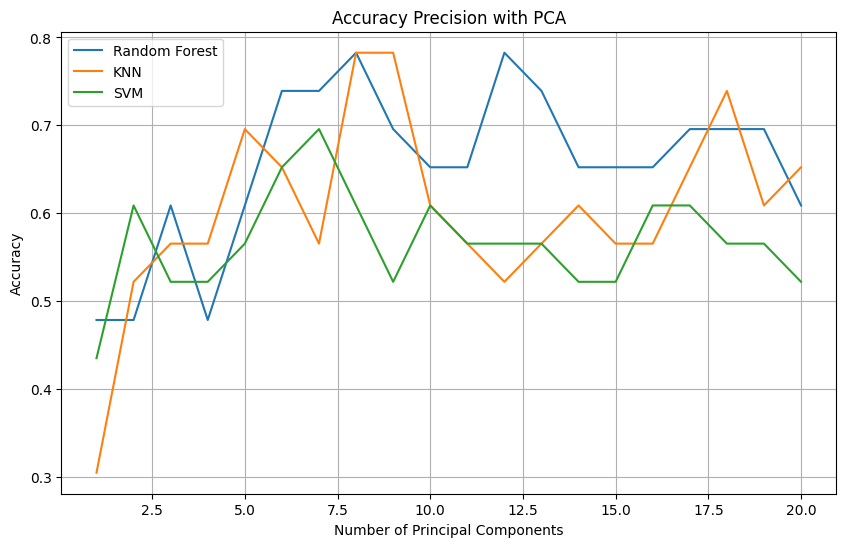

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of number of principal components to test
n_components_range = np.arange(1, X.shape[1]+1)

# Initialize lists to store accuracies for each model
rf_accuracies = []
knn_accuracies = []
svm_accuracies = []

# Iterate over the range of number of principal components
for n_components in n_components_range:
    # Create PCA instances with varying number of components
    pca = PCA(n_components=n_components, random_state=42)
    
    # Create pipelines for each classifier with PCA and the classifier
    rf_pipeline = Pipeline([('pca', pca), ('rf', RandomForestClassifier(random_state=42))])
    knn_pipeline = Pipeline([('pca', pca), ('knn', KNeighborsClassifier())])
    svm_pipeline = Pipeline([('pca', pca), ('svm', SVC(random_state=42))])
    
    # Train Random Forest model with PCA
    rf_pipeline.fit(X_train, y_train)
    # Predict and evaluate Random Forest model with PCA
    rf_accuracy = accuracy_score(y_test, rf_pipeline.predict(X_test))
    rf_accuracies.append(rf_accuracy)
    
    # Train KNN model with PCA
    knn_pipeline.fit(X_train, y_train)
    # Predict and evaluate KNN model with PCA
    knn_accuracy = accuracy_score(y_test, knn_pipeline.predict(X_test))
    knn_accuracies.append(knn_accuracy)
    
    # Train SVM model with PCA
    svm_pipeline.fit(X_train, y_train)
    # Predict and evaluate SVM model with PCA
    svm_accuracy = accuracy_score(y_test, svm_pipeline.predict(X_test))
    svm_accuracies.append(svm_accuracy)

# Plot the accuracy precision graph
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, rf_accuracies, label='Random Forest')
plt.plot(n_components_range, knn_accuracies, label='KNN')
plt.plot(n_components_range, svm_accuracies, label='SVM')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy Precision with PCA')
plt.legend()
plt.grid(True)
plt.show()

Random Forest - Maximum Accuracy Number of Components: 8
KNN - Maximum Accuracy Number of Components: 8
SVM - Maximum Accuracy Number of Components: 7


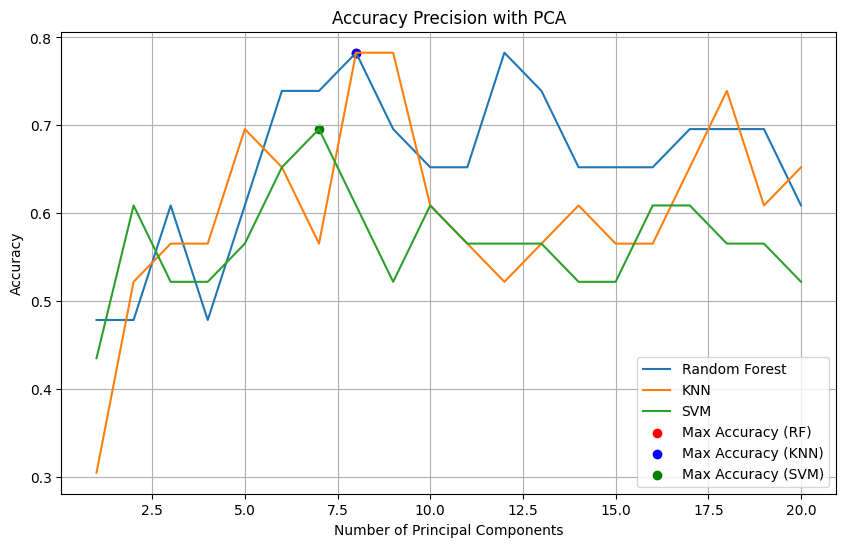

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of number of principal components to test
n_components_range = np.arange(1, X.shape[1]+1)

# Initialize lists to store accuracies for each model
rf_accuracies = []
knn_accuracies = []
svm_accuracies = []

# Iterate over the range of number of principal components
for n_components in n_components_range:
    # Create PCA instances with varying number of components
    pca = PCA(n_components=n_components, random_state=42)
    
    # Create pipelines for each classifier with PCA and the classifier
    rf_pipeline = Pipeline([('pca', pca), ('rf', RandomForestClassifier(random_state=42))])
    knn_pipeline = Pipeline([('pca', pca), ('knn', KNeighborsClassifier())])
    svm_pipeline = Pipeline([('pca', pca), ('svm', SVC(random_state=42))])
    
    # Train Random Forest model with PCA
    rf_pipeline.fit(X_train, y_train)
    # Predict and evaluate Random Forest model with PCA
    rf_accuracy = accuracy_score(y_test, rf_pipeline.predict(X_test))
    rf_accuracies.append(rf_accuracy)
    
    # Train KNN model with PCA
    knn_pipeline.fit(X_train, y_train)
    # Predict and evaluate KNN model with PCA
    knn_accuracy = accuracy_score(y_test, knn_pipeline.predict(X_test))
    knn_accuracies.append(knn_accuracy)
    
    # Train SVM model with PCA
    svm_pipeline.fit(X_train, y_train)
    # Predict and evaluate SVM model with PCA
    svm_accuracy = accuracy_score(y_test, svm_pipeline.predict(X_test))
    svm_accuracies.append(svm_accuracy)

# Find the number of principal components with maximum accuracy for each classifier
rf_max_accuracy_n_components = n_components_range[np.argmax(rf_accuracies)]
knn_max_accuracy_n_components = n_components_range[np.argmax(knn_accuracies)]
svm_max_accuracy_n_components = n_components_range[np.argmax(svm_accuracies)]

print("Random Forest - Maximum Accuracy Number of Components:", rf_max_accuracy_n_components)
print("KNN - Maximum Accuracy Number of Components:", knn_max_accuracy_n_components)
print("SVM - Maximum Accuracy Number of Components:", svm_max_accuracy_n_components)

# Plot the accuracy precision graph
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, rf_accuracies, label='Random Forest')
plt.plot(n_components_range, knn_accuracies, label='KNN')
plt.plot(n_components_range, svm_accuracies, label='SVM')
plt.scatter(rf_max_accuracy_n_components, max(rf_accuracies), color='red', label='Max Accuracy (RF)')
plt.scatter(knn_max_accuracy_n_components, max(knn_accuracies), color='blue', label='Max Accuracy (KNN)')
plt.scatter(svm_max_accuracy_n_components, max(svm_accuracies), color='green', label='Max Accuracy (SVM)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy Precision with PCA')
plt.legend()
plt.grid(True)
plt.show()

Random Forest - Maximum Accuracy Number of Components: 12 - Accuracy: 0.65
KNN - Maximum Accuracy Number of Components: 18 - Accuracy: 0.7
SVM - Maximum Accuracy Number of Components: 15 - Accuracy: 0.7


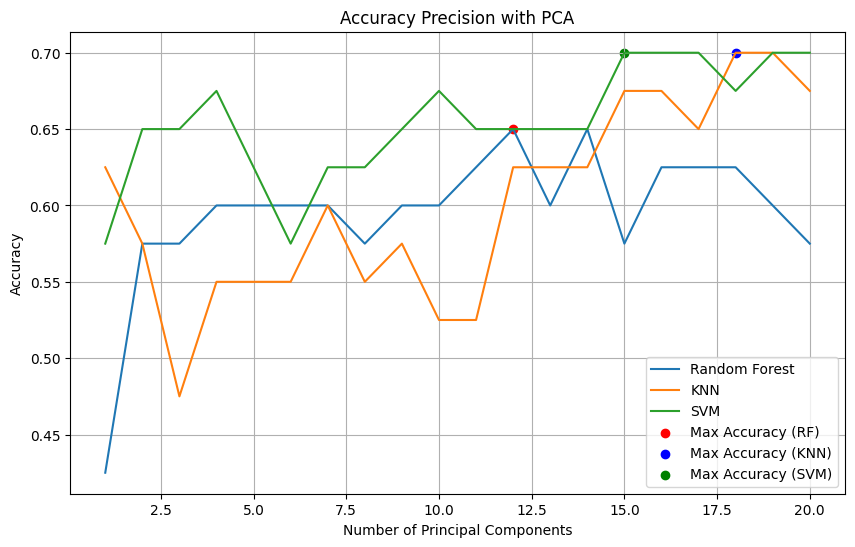

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of number of principal components to test
n_components_range = np.arange(1, X.shape[1]+1)

# Initialize lists to store accuracies for each model
rf_accuracies = []
knn_accuracies = []
svm_accuracies = []

# Iterate over the range of number of principal components
for n_components in n_components_range:
    # Create PCA instances with varying number of components
    pca = PCA(n_components=n_components, random_state=42)
    
    # Create pipelines for each classifier with PCA and the classifier
    rf_pipeline = Pipeline([('pca', pca), ('rf', RandomForestClassifier(random_state=42))])
    knn_pipeline = Pipeline([('pca', pca), ('knn', KNeighborsClassifier())])
    svm_pipeline = Pipeline([('pca', pca), ('svm', SVC(random_state=42))])
    
    # Train Random Forest model with PCA
    rf_pipeline.fit(X_train, y_train)
    # Predict and evaluate Random Forest model with PCA
    rf_accuracy = accuracy_score(y_test, rf_pipeline.predict(X_test))
    rf_accuracies.append(rf_accuracy)
    
    # Train KNN model with PCA
    knn_pipeline.fit(X_train, y_train)
    # Predict and evaluate KNN model with PCA
    knn_accuracy = accuracy_score(y_test, knn_pipeline.predict(X_test))
    knn_accuracies.append(knn_accuracy)
    
    # Train SVM model with PCA
    svm_pipeline.fit(X_train, y_train)
    # Predict and evaluate SVM model with PCA
    svm_accuracy = accuracy_score(y_test, svm_pipeline.predict(X_test))
    svm_accuracies.append(svm_accuracy)

# Find the number of principal components with maximum accuracy for each classifier
rf_max_accuracy_n_components = n_components_range[np.argmax(rf_accuracies)]
knn_max_accuracy_n_components = n_components_range[np.argmax(knn_accuracies)]
svm_max_accuracy_n_components = n_components_range[np.argmax(svm_accuracies)]

# Find the maximum accuracy for each classifier
rf_max_accuracy = max(rf_accuracies)
knn_max_accuracy = max(knn_accuracies)
svm_max_accuracy = max(svm_accuracies)

print("Random Forest - Maximum Accuracy Number of Components:", rf_max_accuracy_n_components, "- Accuracy:", rf_max_accuracy)
print("KNN - Maximum Accuracy Number of Components:", knn_max_accuracy_n_components, "- Accuracy:", knn_max_accuracy)
print("SVM - Maximum Accuracy Number of Components:", svm_max_accuracy_n_components, "- Accuracy:", svm_max_accuracy)

# Plot the accuracy precision graph
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, rf_accuracies, label='Random Forest')
plt.plot(n_components_range, knn_accuracies, label='KNN')
plt.plot(n_components_range, svm_accuracies, label='SVM')
plt.scatter(rf_max_accuracy_n_components, rf_max_accuracy, color='red', label='Max Accuracy (RF)')
plt.scatter(knn_max_accuracy_n_components, knn_max_accuracy, color='blue', label='Max Accuracy (KNN)')
plt.scatter(svm_max_accuracy_n_components, svm_max_accuracy, color='green', label='Max Accuracy (SVM)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy Precision with PCA')
plt.legend()
plt.grid(True)
plt.show()

Random Forest - Maximum Accuracy: 0.675 with 13 features
KNN - Maximum Accuracy: 0.75 with 13 features
SVM - Maximum Accuracy: 0.725 with 11 features


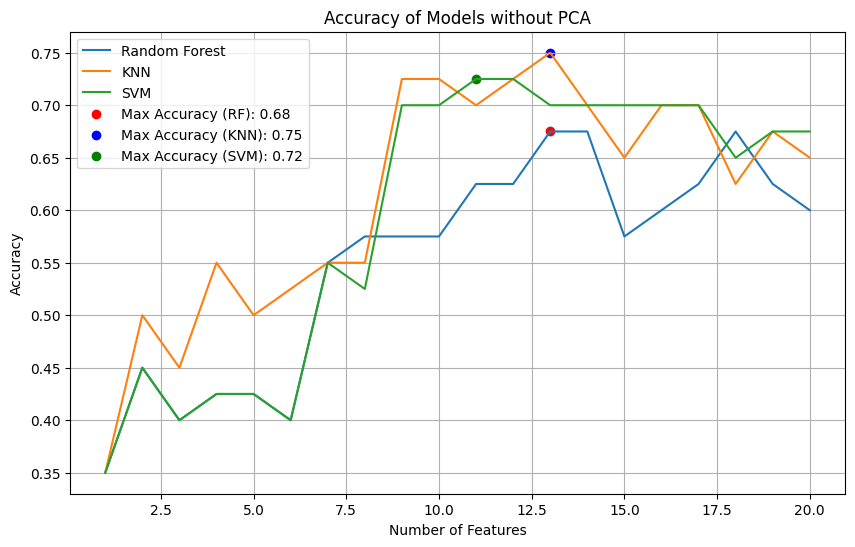

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define a range of number of features to test
n_features_range = np.arange(1, X.shape[1]+1)

# Initialize lists to store accuracies for each model
rf_accuracies = []
knn_accuracies = []
svm_accuracies = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate over the range of number of features
for n_features in n_features_range:
    # Select the first n_features features
    X_train_features = X_train.iloc[:, :n_features]
    X_test_features = X_test.iloc[:, :n_features]
    
    # Initialize and train Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_features, y_train)
    
    # Predict and evaluate Random Forest model
    rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test_features))
    rf_accuracies.append(rf_accuracy)
    
    # Initialize and train KNN model
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train_features, y_train)
    
    # Predict and evaluate KNN model
    knn_accuracy = accuracy_score(y_test, knn_model.predict(X_test_features))
    knn_accuracies.append(knn_accuracy)
    
    # Initialize and train SVM model
    svm_model = SVC(random_state=42)
    svm_model.fit(X_train_features, y_train)
    
    # Predict and evaluate SVM model
    svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test_features))
    svm_accuracies.append(svm_accuracy)

# Find the maximum accuracy for each model
rf_max_accuracy = max(rf_accuracies)
knn_max_accuracy = max(knn_accuracies)
svm_max_accuracy = max(svm_accuracies)

# Find the corresponding number of features for maximum accuracy
rf_max_accuracy_n_features = n_features_range[np.argmax(rf_accuracies)]
knn_max_accuracy_n_features = n_features_range[np.argmax(knn_accuracies)]
svm_max_accuracy_n_features = n_features_range[np.argmax(svm_accuracies)]

print("Random Forest - Maximum Accuracy:", rf_max_accuracy, "with", rf_max_accuracy_n_features, "features")
print("KNN - Maximum Accuracy:", knn_max_accuracy, "with", knn_max_accuracy_n_features, "features")
print("SVM - Maximum Accuracy:", svm_max_accuracy, "with", svm_max_accuracy_n_features, "features")

# Plot the accuracy graph for all models without PCA
plt.figure(figsize=(10, 6))
plt.plot(n_features_range, rf_accuracies, label='Random Forest')
plt.plot(n_features_range, knn_accuracies, label='KNN')
plt.plot(n_features_range, svm_accuracies, label='SVM')
plt.scatter(rf_max_accuracy_n_features, rf_max_accuracy, color='red', label=f'Max Accuracy (RF): {rf_max_accuracy:.2f}')
plt.scatter(knn_max_accuracy_n_features, knn_max_accuracy, color='blue', label=f'Max Accuracy (KNN): {knn_max_accuracy:.2f}')
plt.scatter(svm_max_accuracy_n_features, svm_max_accuracy, color='green', label=f'Max Accuracy (SVM): {svm_max_accuracy:.2f}')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models without PCA')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pickle

# Save the KNN model to a pickle file
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)


In [4]:
import pandas as pd
import pickle

with open('book.pkl','wb') as file:
    books = pd.read_csv('book.csv')

    pickle.dump(books, file)